# **Proyek Analisis Data: Bike Sharing**
- **Nama:** Muhammad Irsyad Fikri Azhar
- **Email:** irsyadfkrz10@gmail.com
- **ID Dicoding:** irsyadfkrz

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan penyewaan sepeda pada hari kerja dibandingkan dengan hari libur?
- Apakah penggunaan meningkat saat cuaca cerah atau menurun saat hujan?

## Import Semua Packages/Library yang Digunakan

In [750]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [615]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [616]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Assesing day_df

In [617]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [618]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [619]:
# Mengubah Tipe data Dteday menjadi Datetime pada Day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%Y-%m-%d')
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [620]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [621]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [622]:
# Memeriksa jumlah baris unik dalam setiap fitur
day_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          499
hum           595
casual        606
windspeed     650
registered    679
atemp         690
cnt           696
instant       731
dteday        731
dtype: int64

#### Assesing Hour_df

In [623]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [624]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [625]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [626]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [627]:
# Memeriksa jumlah baris unik dalam setiap fitur
hour_df.nunique().sort_values()

workingday        2
yr                2
holiday           2
season            4
weathersit        4
weekday           7
mnth             12
hr               24
windspeed        30
temp             50
atemp            65
hum              89
casual          322
dteday          731
registered      776
cnt             869
instant       17379
dtype: int64

### Cleaning Data

#### Cleaning Day_df

In [628]:
# Mengubah Tipe data Dteday menjadi Datetime pada Day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%Y-%m-%d')
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [629]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [630]:
# Mengubah nama kolom agar mudah dibaca
day_df = day_df.rename(columns={'yr':'year', 'mnth':'month', 'cnt': 'counts'})
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [631]:
Q1 = day_df['counts'].quantile(0.25)
Q3 = day_df['counts'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikasi outliers
outliers = day_df[(day_df['counts'] < lower_bound) | (day_df['counts'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts


##### Season (Musim)

In [632]:
print(day_df.season.value_counts())

3    188
2    184
1    181
4    178
Name: season, dtype: int64


In [633]:
# Mengubah angka 1,2,3,4 agar mudah dibaca
day_df.season = day_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
day_df.season.value_counts()

fall      188
summer    184
spring    181
winter    178
Name: season, dtype: int64

##### Year (Tahun)

In [634]:
print( day_df.year.value_counts())

1    366
0    365
Name: year, dtype: int64


In [635]:
# Mengubah nama kolom agar mudah dibaca
day_df.year = day_df.year.map({0:'2011', 1:'2012'})


##### Month (Bulan)

In [636]:
print(day_df.month.value_counts())

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: month, dtype: int64


In [637]:
day_df.month = day_df.month.map({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

##### Weathersit (Kondisi Cuaca)

In [638]:
print(day_df.weathersit.value_counts())

1    463
2    247
3     21
Name: weathersit, dtype: int64


In [639]:
day_df.weathersit = day_df.weathersit.map({1:'Clear', 2:'Cloudy', 3:'Snow/Rain'})

##### Weekday

In [640]:
print(day_df.weekday.value_counts())

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64


In [641]:
day_df.weekday = day_df.weekday.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})


In [642]:
print(day_df.workingday.value_counts())

1    500
0    231
Name: workingday, dtype: int64


In [643]:
day_df.workingday = day_df.workingday.map({0:'Hari Kerja', 1:'Hari Libur',})

In [644]:
day_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,1,2011-01-01,spring,2011,Jan,0,Sunday,Hari Kerja,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,Jan,0,Monday,Hari Kerja,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,Jan,0,Tuesday,Hari Libur,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,Jan,0,Wednesday,Hari Libur,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,Jan,0,Thursday,Hari Libur,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Cleaning Hour_df

In [645]:
# Mengubah Tipe data Dteday menjadi Datetime pada Day_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], format='%Y-%m-%d')
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [646]:
hour_df['hr'].value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

In [647]:
# Mengubah nama kolom agar mudah dibaca
hour_df = hour_df.rename(columns={'yr':'year', 'mnth':'month', 'cnt': 'counts', 'hr':'hour'})
hour_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [648]:
hour_df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [649]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  counts      17379 non-

In [650]:
hour_df = pd.get_dummies(hour_df, columns=['season'], dtype=int)
hour_df.head()

,instant,dteday,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts,season_1,season_2,season_3,season_4
0,1,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,3,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,4,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,5,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0,0,0


In [651]:
hour_df.describe()

,instant,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts,season_1,season_2,season_3,season_4
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.244088,0.253697,0.258703,0.243512
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.429557,0.435139,0.437935,0.429214
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000,0.000000,0.000000,0.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000,1.000000,1.000000,0.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis (EDA)

### Explore Day_df

In [652]:
# Menghapus kolom instan karena hanya untuk indeks
day_df = day_df.drop(columns=['instant'])

In [653]:
# Memeriksa kolom dteday
print('\ndteday')
print(day_df.dteday.nunique())  # Menampilkan jumlah nilai unik dalam kolom 'dteday'
print(day_df.dteday.value_counts())  # Menampilkan distribusi nilai dalam kolom 'dteday'

# Memeriksa kolom year
print('\nyear')
print(day_df.year.nunique())  # Menampilkan jumlah nilai unik dalam kolom 'year'
print(day_df.year.value_counts())  # Menampilkan distribusi nilai dalam kolom 'year'

# Memeriksa kolom month
print('\nmonth')
print(day_df.month.nunique())  # Menampilkan jumlah nilai unik dalam kolom 'month'
print(day_df.month.value_counts())  # Menampilkan distribusi nilai dalam kolom 'month'

# Memeriksa kolom weekday
print('\nweekday')
print(day_df.weekday.nunique())  # Menampilkan jumlah nilai unik dalam kolom 'weekday'
print(day_df.weekday.value_counts())  # Menampilkan distribusi nilai dalam kolom 'weekday'

# Memeriksa kolom working day
print('\nworkingday')
print(day_df.workingday.nunique())  # Menampilkan jumlah nilai unik dalam kolom 'workingday'
print(day_df.workingday.value_counts())  # Menampilkan distribusi nilai dalam kolom 'workingday'

# Memeriksa kolom holiday
print('\nholiday')
print(day_df.holiday.nunique())  # Menampilkan jumlah nilai unik dalam kolom 'holiday'
print(day_df.holiday.value_counts())  # Menampilkan distribusi nilai dalam kolom 'holiday'

# Memeriksa kolom weathersit
print('\nweathersit')
print(day_df.weathersit.nunique())  # Menampilkan jumlah nilai unik dalam kolom 'weathersit'
print(day_df.weathersit.value_counts())  # Menampilkan distribusi nilai dalam kolom 'weathersit'

# Memeriksa kolom season
print('\nseason')
print(day_df.season.nunique())  # Menampilkan jumlah nilai unik dalam kolom 'season'
print(day_df.season.value_counts())  # Menampilkan distribusi nilai dalam kolom 'season'



dteday
731
2012-02-14    1
2011-04-25    1
2012-08-16    1
2011-06-26    1
2012-02-23    1
             ..
2012-06-02    1
2011-04-12    1
2012-12-15    1
2011-06-13    1
2011-12-14    1
Name: dteday, Length: 731, dtype: int64

year
2
2012    366
2011    365
Name: year, dtype: int64

month
12
Oct      62
March    62
July     62
Aug      62
Dec      62
May      62
Jan      62
June     60
Nov      60
April    60
Sept     60
Feb      57
Name: month, dtype: int64

weekday
7
Tuesday      105
Monday       105
Sunday       105
Wednesday    104
Saturday     104
Friday       104
Thursday     104
Name: weekday, dtype: int64

workingday
2
Hari Libur    500
Hari Kerja    231
Name: workingday, dtype: int64

holiday
2
0    710
1     21
Name: holiday, dtype: int64

weathersit
3
Clear        463
Cloudy       247
Snow/Rain     21
Name: weathersit, dtype: int64

season
4
fall      188
summer    184
spring    181
winter    178
Name: season, dtype: int64


In [654]:
# Membagi variabel dalam dataset menjadi dua kelompok berdasarkan jenisnya

# variabel kategorikal
cat_vars = ['season', 'year', 'month', 'weekday', 'workingday', 'weathersit']

# variabel numerik
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'counts']

In [655]:
day_df.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts
0,2011-01-01,spring,2011,Jan,0,Sunday,Hari Kerja,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,spring,2011,Jan,0,Monday,Hari Kerja,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,spring,2011,Jan,0,Tuesday,Hari Libur,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,spring,2011,Jan,0,Wednesday,Hari Libur,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,spring,2011,Jan,0,Thursday,Hari Libur,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [656]:
day_df.windspeed.describe()

count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64

In [657]:
day_df.temp.describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [658]:
day_df.atemp.describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64

In [659]:
day_df.hum.describe()

count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64

In [660]:
day_df.counts.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: counts, dtype: float64

In [661]:
day_df.casual.describe()

count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: casual, dtype: float64

In [662]:
day_df.registered.describe()

count     731.000000
mean     3656.172367
std      1560.256377
min        20.000000
25%      2497.000000
50%      3662.000000
75%      4776.500000
max      6946.000000
Name: registered, dtype: float64

### Explore Hour_df

In [663]:
# Menghapus kolom instan karena hanya untuk indeks
hour_df = hour_df.drop(columns=['instant'])

In [664]:
hour_df.describe()

,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,counts,season_1,season_2,season_3,season_4
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.244088,0.253697,0.258703,0.243512
std,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.429557,0.435139,0.437935,0.429214
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000,1.000000,1.000000,1.000000


In [665]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   year        17379 non-null  int64         
 2   month       17379 non-null  int64         
 3   hour        17379 non-null  int64         
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  int64         
 6   workingday  17379 non-null  int64         
 7   weathersit  17379 non-null  int64         
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  counts      17379 non-null  int64         
 15  season_1    17379 non-null  int32         
 16  season_2    17379 non-

In [666]:
# Perbandingan kategori pada hari kerja (workingday)
print("Perbandingan kategori pada hari kerja (workingday):")
print(hour_df.groupby('workingday')['counts'].mean())

Perbandingan kategori pada hari kerja (workingday):
workingday
0    181.405332
1    193.207754
Name: counts, dtype: float64


In [667]:
print("Distribusi variabel numerik:")
print(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'counts']].describe())

print("Distribusi variabel kategorikal:")
print(hour_df[['season_1','season_2','season_3','season_4']].value_counts())


Distribusi variabel numerik:
               temp         atemp           hum     windspeed        casual  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.496987      0.475775      0.627229      0.190098     35.676218   
std        0.192556      0.171850      0.192930      0.122340     49.305030   
min        0.020000      0.000000      0.000000      0.000000      0.000000   
25%        0.340000      0.333300      0.480000      0.104500      4.000000   
50%        0.500000      0.484800      0.630000      0.194000     17.000000   
75%        0.660000      0.621200      0.780000      0.253700     48.000000   
max        1.000000      1.000000      1.000000      0.850700    367.000000   

         registered        counts  
count  17379.000000  17379.000000  
mean     153.786869    189.463088  
std      151.357286    181.387599  
min        0.000000      1.000000  
25%       34.000000     40.000000  
50%      115.000000    142.000000  
75%    

In [668]:
# Korelasi Antara Variabel
correlation_matrix = hour_df.corr()
print("Korelasi matriks:")
print(correlation_matrix)

Korelasi matriks:
                year     month      hour   holiday   weekday  workingday  \
year        1.000000 -0.010473 -0.003867  0.006692 -0.004485   -0.002196   
month      -0.010473  1.000000 -0.005772  0.018430  0.010400   -0.003477   
hour       -0.003867 -0.005772  1.000000  0.000479 -0.003498    0.002285   
holiday     0.006692  0.018430  0.000479  1.000000 -0.102088   -0.252471   
weekday    -0.004485  0.010400 -0.003498 -0.102088  1.000000    0.035955   
workingday -0.002196 -0.003477  0.002285 -0.252471  0.035955    1.000000   
weathersit -0.019157  0.005400 -0.020203 -0.017036  0.003311    0.044672   
temp        0.040913  0.201691  0.137603 -0.027340 -0.001795    0.055390   
atemp       0.039222  0.208096  0.133750 -0.030973 -0.008821    0.054667   
hum        -0.083546  0.164411 -0.276498 -0.010588 -0.037158    0.015688   
windspeed  -0.008740 -0.135386  0.137252  0.003988  0.011502   -0.011830   
casual      0.142779  0.068457  0.301202  0.031564  0.032721   -0.3009

In [669]:
hour_df['counts'].sum()

3292679

### Explore All-df

In [709]:
# Pastikan tidak ada data yang duplicate sebelum di merge
print(day_df.duplicated('dteday').sum())
print(hour_df.duplicated('dteday').sum())

0
0


In [711]:
# Jika ada maka hapus duplikasi hingga 0
day_df = day_df.drop_duplicates('dteday')
hour_df = hour_df.drop_duplicates('dteday')

In [707]:
# Merge DataFrame dengan memastikan kolom 'dteday' dan 'hour' unik
all_df = pd.merge(day_df, hour_df[['dteday', 'hour', 'season_1', 'season_2', 'season_3', 'season_4']], how='inner', on='dteday')

# Berikan sufiks yang berbeda untuk kolom yang memiliki nama yang sama
all_df['hour'] = hour_df['hour']

In [698]:
all_df.describe()

,holiday,temp,atemp,hum,windspeed,casual,registered,counts,hour,season_1,season_2,season_3,season_4
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.028770,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,11.546752,0.244088,0.253697,0.258703,0.243512
std,0.167165,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,6.914405,0.429557,0.435139,0.437935,0.429214
min,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,18.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000,1.000000,1.000000,1.000000,1.000000


In [699]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   year        17379 non-null  object        
 3   month       17379 non-null  object        
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  object        
 6   workingday  17379 non-null  object        
 7   weathersit  17379 non-null  object        
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  counts      17379 non-null  int64         
 15  hour        17379 non-null  int64         
 16  season_1    17379 non-

In [708]:
all_df['counts'].sum()

3292679

In [674]:
print("Unique values in 'counts':", len(all_df['counts'].unique()))

Unique values in 'counts': 696


In [675]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   year        17379 non-null  object        
 3   month       17379 non-null  object        
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  object        
 6   workingday  17379 non-null  object        
 7   weathersit  17379 non-null  object        
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  counts      17379 non-null  int64         
 15  hour        17379 non-null  int64         
 16  season_1    17379 non-

In [676]:
all_df.groupby(by=["dteday", "season"]).agg({
    "temp": "mean",
    "atemp": "mean",
    "hum": "mean",
    "counts": "sum"
})

,,temp,atemp,hum,counts
dteday,season,,,,
2011-01-01,spring,0.344167,0.363625,0.805833,23640
2011-01-02,spring,0.363478,0.353739,0.696087,18423
2011-01-03,spring,0.196364,0.189405,0.437273,29678
2011-01-04,spring,0.200000,0.212122,0.590435,35926
2011-01-05,spring,0.226957,0.229270,0.436957,36800
...,...,...,...,...,...
2012-12-27,spring,0.254167,0.226642,0.652917,50736
2012-12-28,spring,0.253333,0.255046,0.590000,74280
2012-12-29,spring,0.253333,0.242400,0.752917,32184


In [677]:
all_df.describe()

,holiday,temp,atemp,hum,windspeed,casual,registered,counts,hour,season_1,season_2,season_3,season_4
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.028770,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,11.546752,0.244088,0.253697,0.258703,0.243512
std,0.167165,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,6.914405,0.429557,0.435139,0.437935,0.429214
min,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,18.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000,1.000000,1.000000,1.000000,1.000000


In [678]:
all_df.counts.value_counts()

4098    48
4401    48
2425    48
5409    48
6591    48
        ..
4334    17
506     16
683     12
431      8
22       1
Name: counts, Length: 696, dtype: int64

In [679]:
all_df.season.value_counts()

fall      4496
summer    4409
spring    4242
winter    4232
Name: season, dtype: int64

In [680]:
all_df.counts.sum()

78791050

In [682]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   year        17379 non-null  object        
 3   month       17379 non-null  object        
 4   holiday     17379 non-null  int64         
 5   weekday     17379 non-null  object        
 6   workingday  17379 non-null  object        
 7   weathersit  17379 non-null  object        
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  hum         17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  counts      17379 non-null  int64         
 15  hour        17379 non-null  int64         
 16  season_1    17379 non-

In [683]:
print("Jumlah duplikasi: ", all_df.duplicated().sum())

Jumlah duplikasi:  0


In [681]:
all_df.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

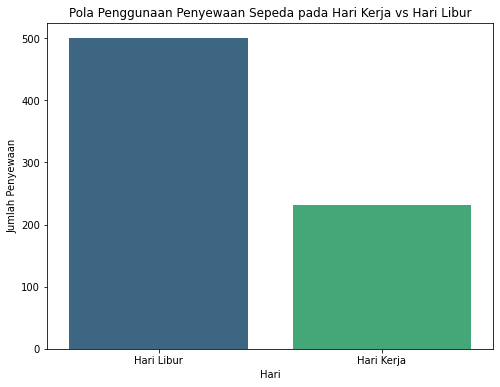

In [747]:
# Pola Penggunaan Penyewaan Sepeda pada Hari Kerja vs Hari Libur
all_type_counts = all_df['workingday'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=all_type_counts.index, y=all_type_counts.values, palette='viridis')

plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.title('Pola Penggunaan Penyewaan Sepeda pada Hari Kerja vs Hari Libur')
plt.show()


Analisis tren dari waktu ke waktu:


<AxesSubplot:title={'center':'Tren Penyewaan Sepeda dari Waktu ke Waktu'}, xlabel='dteday'>

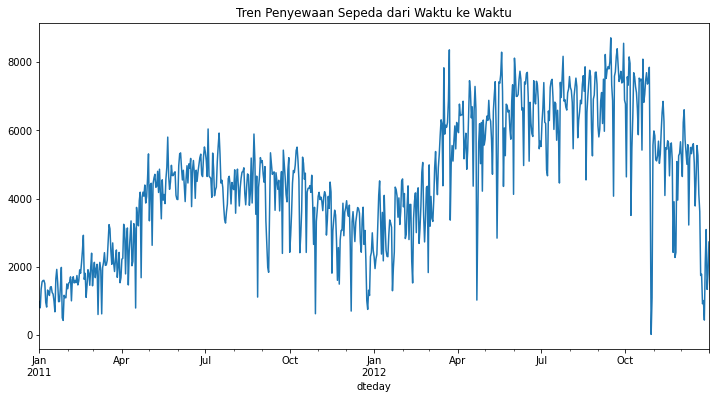

In [713]:
# Analisis Tren Waktu
print("\nAnalisis tren dari waktu ke waktu:")
all_df.set_index('dteday')['counts'].plot(figsize=(12, 6), title='Tren Penyewaan Sepeda dari Waktu ke Waktu')

c:\Users\Azhar\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


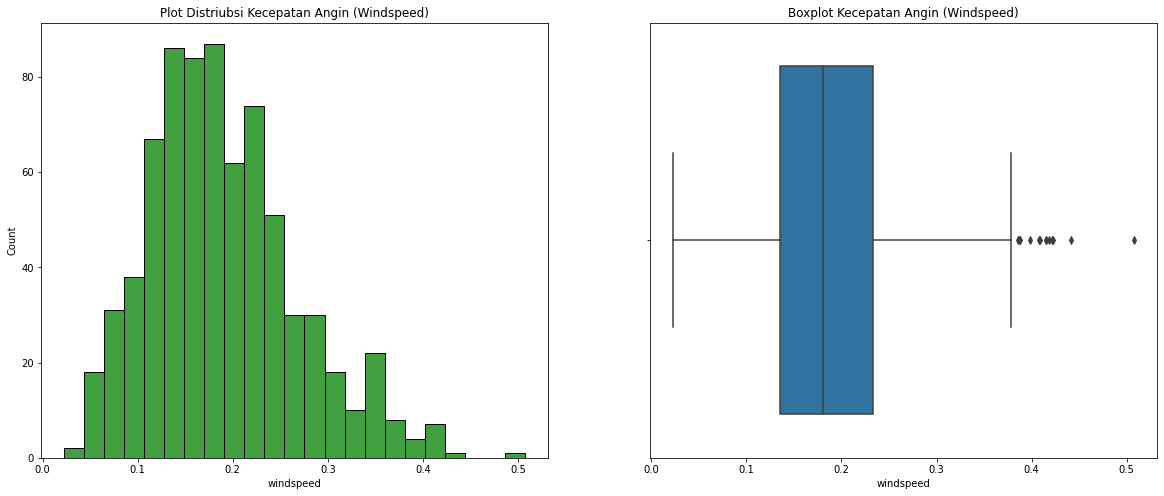

In [714]:
# Visualisasi Distribusi dan Karakteristik Variabel Windspeed
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Plot Distriubsi Kecepatan Angin (Windspeed)")
sns.histplot(all_df.windspeed, color = 'green')

plt.subplot(1,2,2)
plt.title("Boxplot Kecepatan Angin (Windspeed)")
sns.boxplot(all_df.windspeed)

plt.show()

c:\Users\Azhar\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


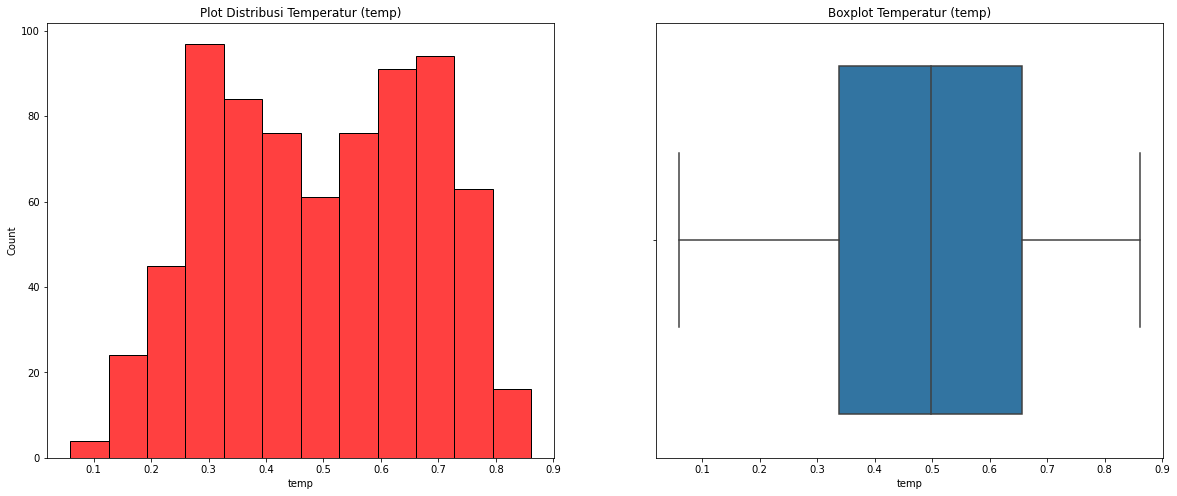

In [715]:
# Visualisasi Distribusi dan Karakteristik Variabel Temp
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Plot Distribusi Temperatur (temp)")
sns.histplot(all_df.temp, color='red')

plt.subplot(1,2,2)
plt.title("Boxplot Temperatur (temp)")
sns.boxplot(all_df.temp)

plt.show()

c:\Users\Azhar\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


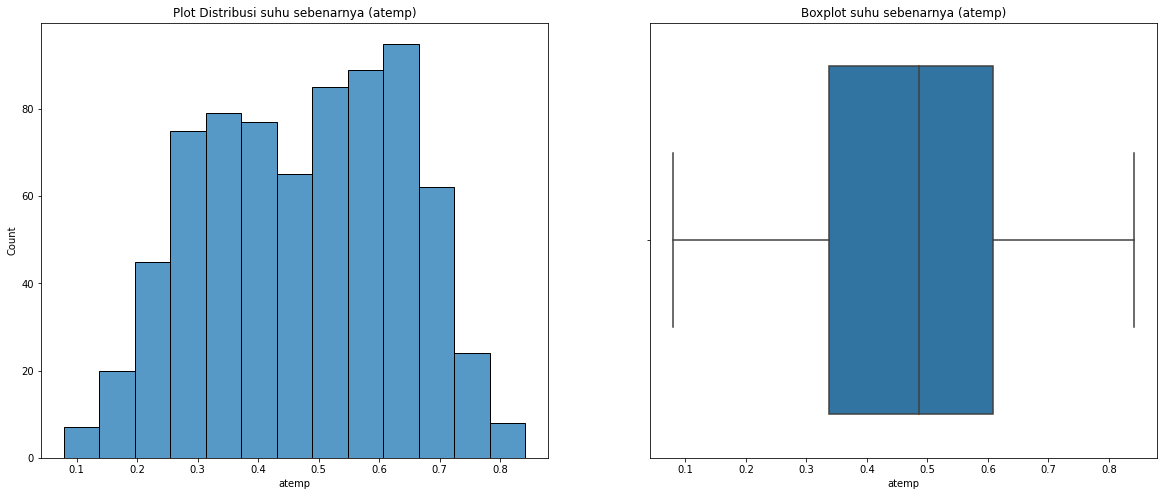

In [717]:
# Visualisasi Distribusi dan Karakteristik Variabel Atemp
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Plot Distribusi suhu sebenarnya (atemp)")
sns.histplot(all_df.atemp)

plt.subplot(1,2,2)
plt.title("Boxplot suhu sebenarnya (atemp)")
sns.boxplot(all_df.atemp)

plt.show()

c:\Users\Azhar\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


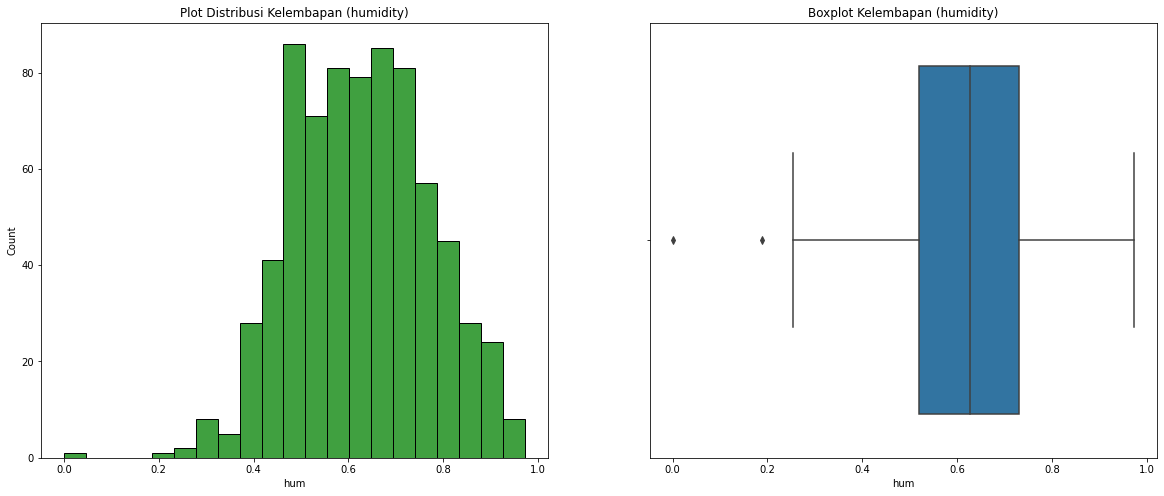

In [718]:
# Visualisasi Distribusi dan Karakteristik Variabel Humidity
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Plot Distribusi Kelembapan (humidity)")
sns.histplot(all_df.hum, color = 'g')

plt.subplot(1,2,2)
plt.title("Boxplot Kelembapan (humidity)")
sns.boxplot(all_df.hum)

plt.show()

c:\Users\Azhar\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


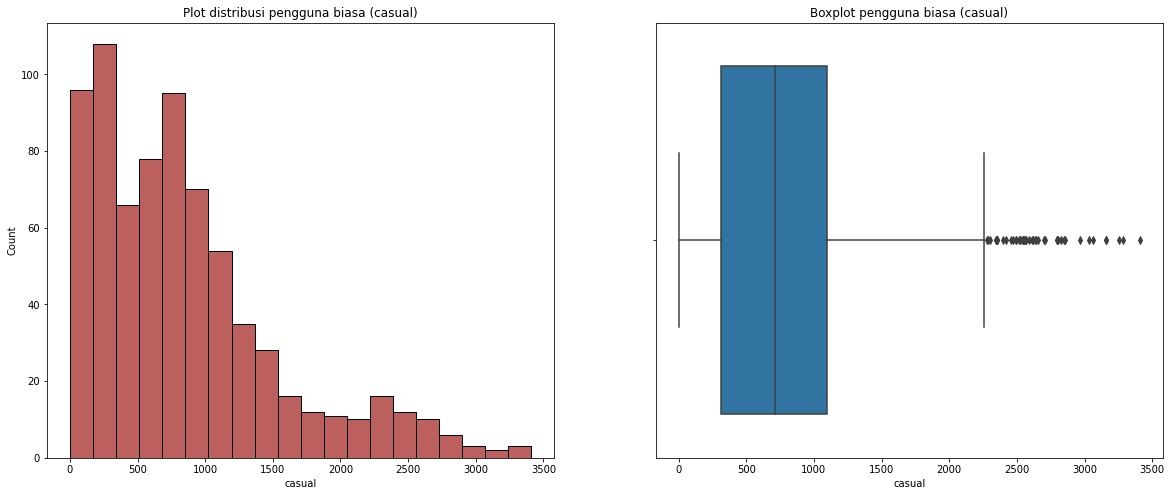

In [719]:
# Visualisasi Distribusi dan Karakteristik Variabel Casual
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Plot distribusi pengguna biasa (casual)")
sns.histplot(all_df.casual, color = 'brown')

plt.subplot(1,2,2)
plt.title("Boxplot pengguna biasa (casual)")
sns.boxplot(all_df.casual)

plt.show()

c:\Users\Azhar\anaconda3\envs\tf2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


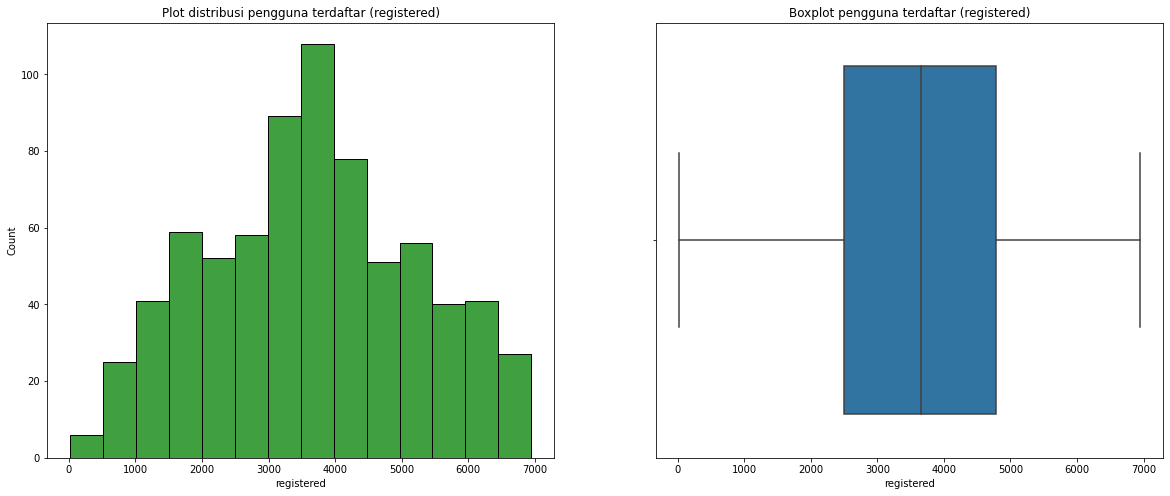

In [720]:
# Visualisasi Distribusi dan Karakteristik Variabel Registered
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Plot distribusi pengguna terdaftar (registered)")
sns.histplot(all_df.registered, color = 'green')

plt.subplot(1,2,2)
plt.title("Boxplot pengguna terdaftar (registered)")
sns.boxplot(all_df.registered)

plt.show()

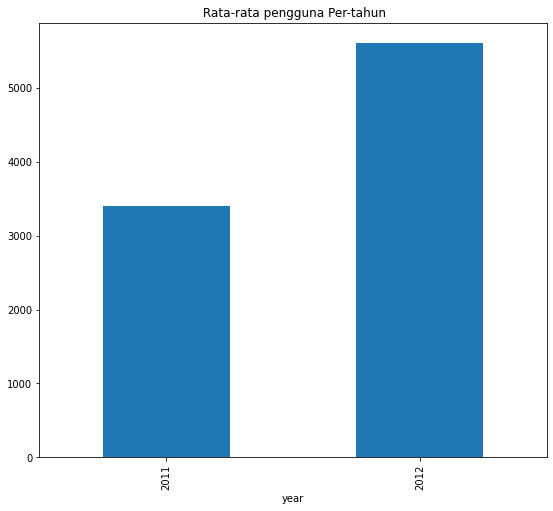

In [721]:
# Visualisasi Rata-rata pengguna pertahun
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title(" Rata-rata pengguna Per-tahun")
all_df.groupby('year')['counts'].mean().plot.bar()
plt.show()

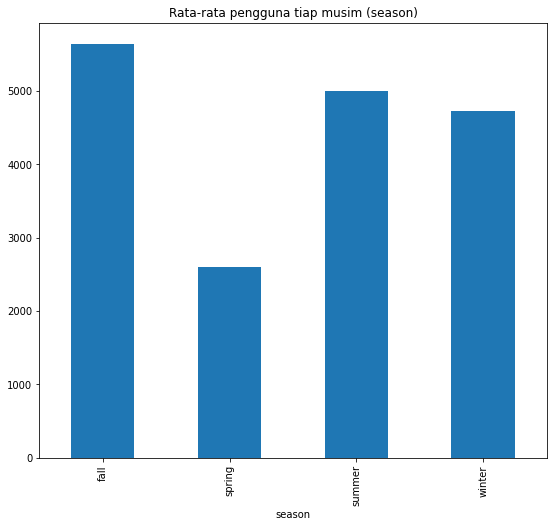

In [722]:
# Visualisasi Rata-rata pengguna tiap musim (season)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Rata-rata pengguna tiap musim (season)")
all_df.groupby('season')['counts'].mean().plot.bar()
plt.show()

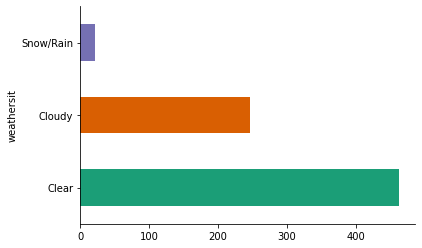

In [723]:
# Distribusi dan kecenderungan pengguna terkait cuaca
all_df.groupby('weathersit').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

Text(0.5, 1.0, 'Distribusi sewa sepeda V/S hari dalam seminggu')

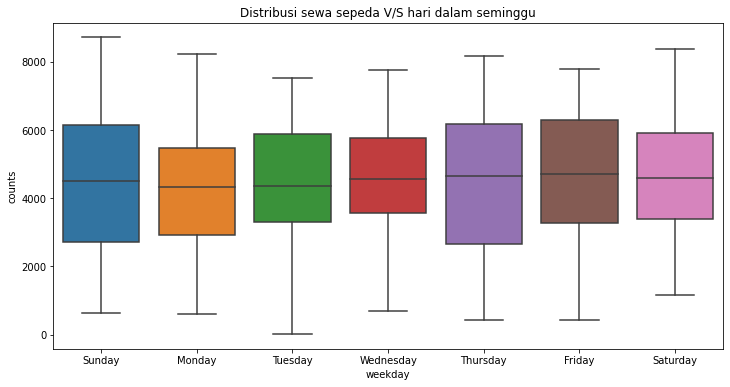

In [748]:
# Dsitribusi sewa perhari
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='counts', data=all_df)
plt.title('Distribusi sewa sepeda V/S hari dalam seminggu')

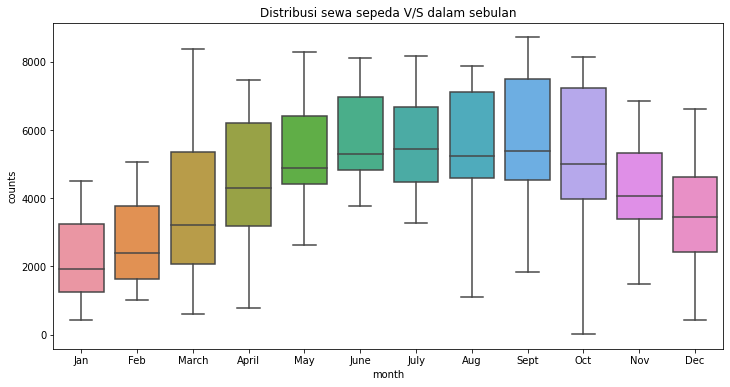

In [725]:
# Distribusi sewa sepeda perbulan
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='counts', data=all_df)
plt.title('Distribusi sewa sepeda V/S dalam sebulan')
plt.show()

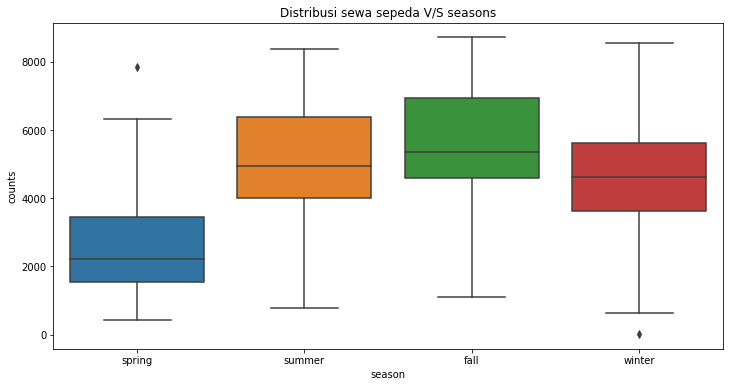

In [726]:
# Distribusi sewa sepeda permusim
hour_df['season'] = hour_df[['season_1', 'season_2', 'season_3', 'season_4']].idxmax(axis=1)
hour_df['season'] = hour_df['season'].map({'season_1': 'spring', 'season_2': 'summer', 'season_3': 'fall', 'season_4': 'winter'})
plt.figure(figsize=(12,6))
sns.boxplot(x='season', y='counts', data=all_df)
plt.title('Distribusi sewa sepeda V/S seasons')
plt.show()

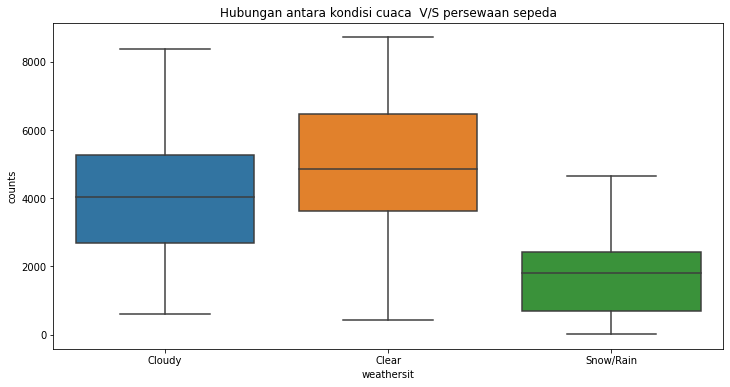

In [727]:
# Hubungan antara kondisi cuaca dengan persewaan sepeda
plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='counts', data=all_df)
plt.title('Hubungan antara kondisi cuaca  V/S persewaan sepeda')
plt.show()

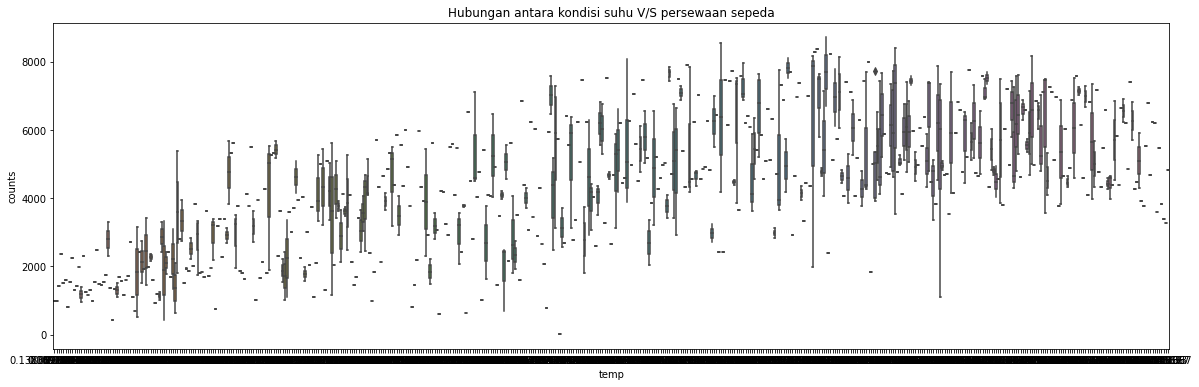

In [733]:
# Hubungan antara kondisi suhu pada persewaan sepeda
plt.figure(figsize=(20,6))
sns.boxplot(x='temp', y='counts', data=all_df)
plt.title('Hubungan antara kondisi suhu V/S persewaan sepeda')
plt.show()

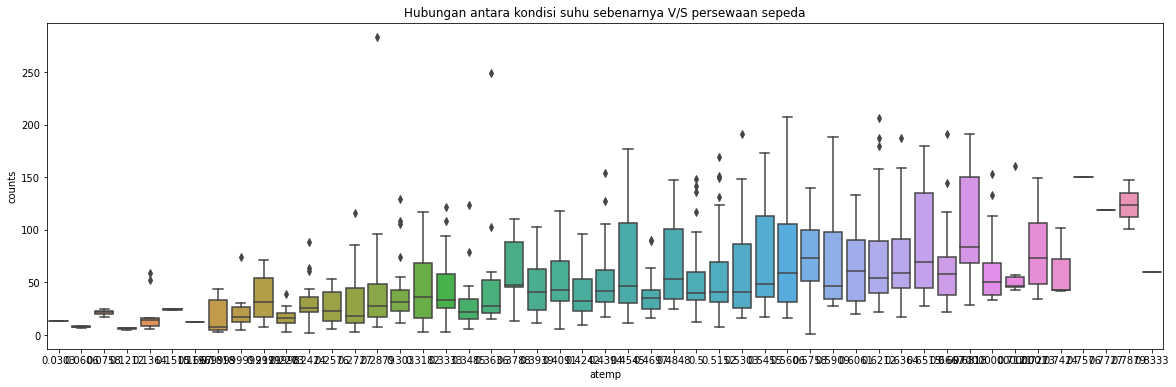

In [729]:
# Hubungan antara kondisi suhu sebenarnya pada persewaan sepeda 
plt.figure(figsize=(20,6))
sns.boxplot(x='atemp', y='counts', data=hour_df)
plt.title('Hubungan antara kondisi suhu sebenarnya V/S persewaan sepeda')
plt.show()

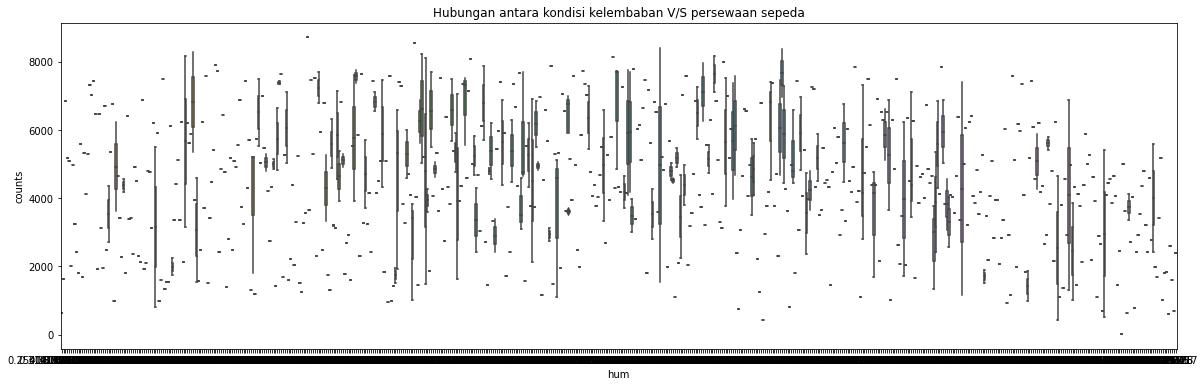

In [734]:
# Hubungan antara kondisi kelembaban pada persewaan sepeda
plt.figure(figsize=(20,6))
sns.boxplot(x='hum', y='counts', data=all_df)
plt.title('Hubungan antara kondisi kelembaban V/S persewaan sepeda')
plt.show()

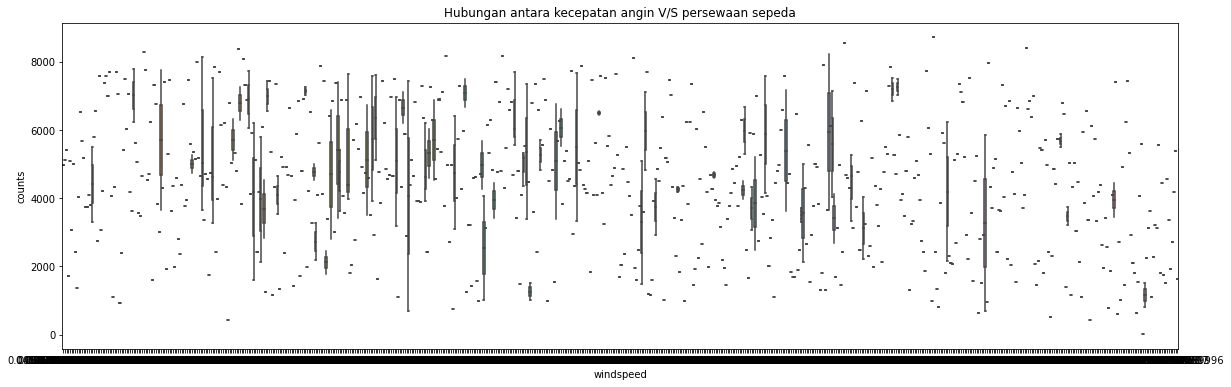

In [735]:
# Hubungan antara kecepatan angin pada persewaan sepeda
plt.figure(figsize=(20,6))
sns.boxplot(x='windspeed', y='counts', data=all_df)
plt.title('Hubungan antara kecepatan angin V/S persewaan sepeda')
plt.show()

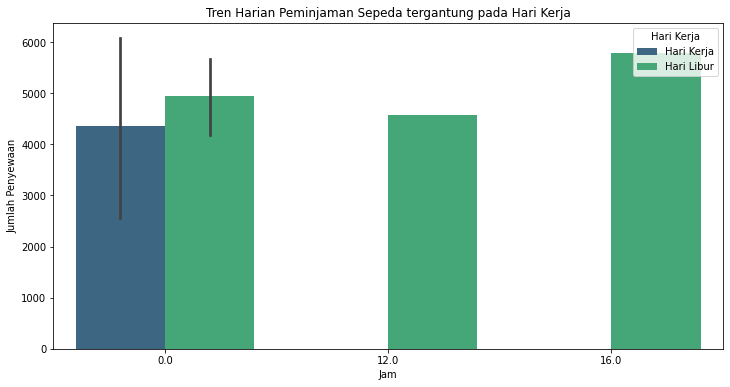

In [746]:
# Tren harian peminjaman sepeda tergantung pada hari kerja (workingday)
plt.figure(figsize=(12, 6))

sns.barplot(x='hour', y='counts', hue='workingday', data=all_df, palette='viridis')

plt.title('Tren Harian Peminjaman Sepeda tergantung pada Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')

# Tampilkan legenda
plt.legend(title='Hari Kerja', loc='upper right')

plt.show()


Analisis tren dari waktu ke waktu:


<AxesSubplot:title={'center':'Tren Penyewaan Sepeda dari Waktu ke Waktu'}, xlabel='dteday'>

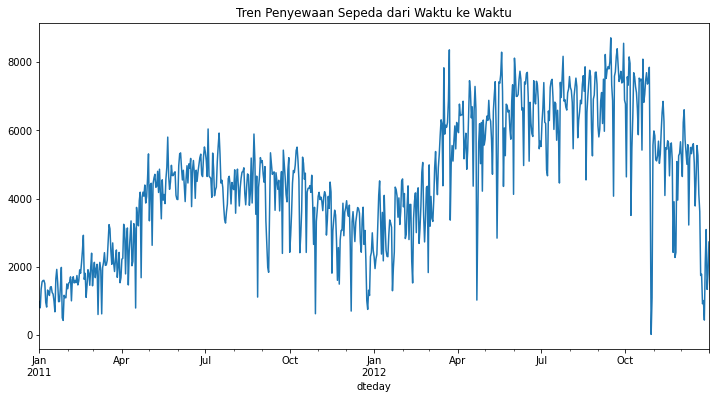

In [737]:
# Analisis Tren Waktu
print("\nAnalisis tren dari waktu ke waktu:")
all_df.set_index('dteday')['counts'].plot(figsize=(12, 6), title='Tren Penyewaan Sepeda dari Waktu ke Waktu')


## Analysis Lanjutan menggunakan K-Means Clustering

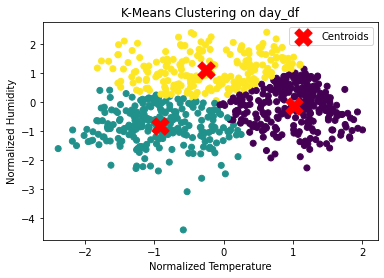

In [738]:
# Mengelompokkan data ke dalam beberapa cluster berdasarkan kemiripan fitur menggunakan K-Means CLustering
X = all_df[['temp', 'hum']]

# Normalisasi fitur
X_normalized = (X - X.mean()) / X.std()

# Menentukan jumlah cluster (k)
k = 3

# Inisialisasi centroid secara acak
np.random.seed(42)
centroids = X_normalized.sample(k).to_numpy()

# Melakukan iterasi hingga konvergensi
max_iter = 100
for _ in range(max_iter):

    # Menghitung jarak antara setiap titik dan centroid
    distances = np.linalg.norm(X_normalized.values[:, np.newaxis] - centroids, axis=2)

    # Menentukan cluster untuk setiap titik berdasarkan jarak terdekat
    labels = np.argmin(distances, axis=1)

    # Memperbarui centroid berdasarkan rata-rata titik dalam setiap cluster
    new_centroids = np.array([X_normalized[labels == i].mean(axis=0) for i in range(k)])

    # Memeriksa konvergensi
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids

# Menambahkan kolom cluster ke dataframe
day_df['cluster'] = labels

# Visualisasi
plt.scatter(X_normalized['temp'], X_normalized['hum'], c=day_df['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Normalized Temperature')
plt.ylabel('Normalized Humidity')
plt.title('K-Means Clustering on day_df')
plt.legend()
plt.show()

## Pertanyaan

### Pertanyaan 1: Bagaimana pola penggunaan penyewaan sepeda pada hari kerja dibandingkan dengan hari libur?

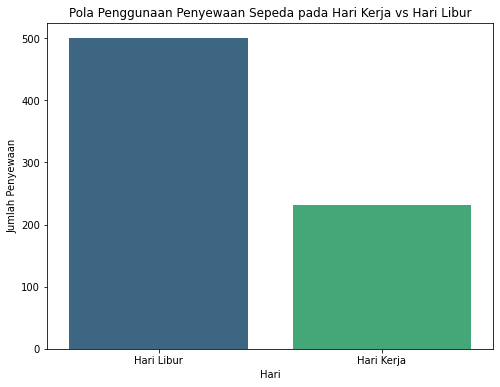

In [739]:
# Bagaimana pola penggunaan penyewaan sepeda pada hari kerja dibandingkan dengan hari libur?
day_type_counts = all_df['workingday'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=day_type_counts.index, y=day_type_counts.values, palette='viridis')

plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.title('Pola Penggunaan Penyewaan Sepeda pada Hari Kerja vs Hari Libur')

plt.show()

### Pertanyaan 2: Apakah penggunaan meningkat saat cuaca cerah atau menurun saat hujan?

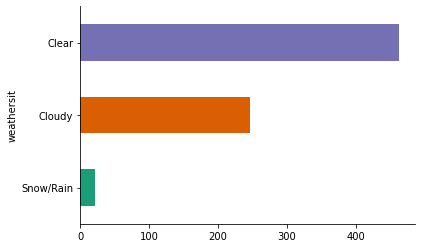

In [741]:
# Apakah penggunaan meningkat saat cuaca cerah atau menurun saat hujan?

all_df.groupby('weathersit').size().sort_values(ascending=True).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

## Conclusion/Kesimpulan

- Pada Hari Libur terdapat peningkatan penggunaan/penyewaan sepeda, sedangkan pada Hari Kerja mengalami penurunan.
- Ya, ada penurunan penggunaan/penyewaan pada saat hujan, hal tersebut bisa terlihat pada diagram batang pada visualisasi data diatas.